In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs
df_url = "G:/policy.csv"
df = pd.read_csv(df_url)

In [5]:
datasets = make_blobs(n_samples=100, n_features=2, centers= 8 , cluster_std=1.8, random_state=101)

In [6]:
datasets[0].shape

(100, 2)

In [7]:
print("***** policy_Set *****")
print(df.head())
print("\n")

***** policy_Set *****
   Age Nationality Type of Coverage  No Claim Availed  \
0   30      Indian    Comprehensive                 0   
1   19      Indian      Third Party                 2   
2   18      Indian    Comprehensive                 1   
3   28      Indian    Comprehensive                 0   
4   33      Indian    Comprehensive                 0   

   Years of Insurance undertaking  Vehicle Age Years  Year of Purchase  \
0                               5                 20              1998   
1                               8                 10              2009   
2                               2                  5              2014   
3                               3                 15              2004   
4                               8                 10              2009   

  Restricted No. of Drivers  Mileage Kms  Vehicle Power in KW  Annual Premium  
0                       yes           16                  800            2000  
1                        No  

In [8]:
print("***** policy_Set *****")
print(df.describe())
print("\n")

***** policy_Set *****
             Age  No Claim Availed  Years of Insurance undertaking  \
count  28.000000         28.000000                       28.000000   
mean   37.321429          0.642857                        6.214286   
std    15.138994          0.558721                        3.784541   
min    18.000000          0.000000                        0.000000   
25%    26.500000          0.000000                        4.000000   
50%    32.500000          1.000000                        5.500000   
75%    53.000000          1.000000                        8.000000   
max    63.000000          2.000000                       19.000000   

       Vehicle Age Years  Year of Purchase  Mileage Kms  Vehicle Power in KW  \
count          28.000000         28.000000    28.000000            28.000000   
mean            9.392857       2009.571429    17.285714           918.571429   
std             5.258780          5.336309     4.454354            70.800413   
min             2.000000  

In [9]:
print(df.columns.values)

['Age' 'Nationality' 'Type of Coverage' 'No Claim Availed'
 'Years of Insurance undertaking' 'Vehicle Age Years' 'Year of Purchase'
 'Restricted No. of Drivers' 'Mileage Kms' 'Vehicle Power in KW'
 'Annual Premium']


In [10]:
df.isna().head()

,Age,Nationality,Type of Coverage,No Claim Availed,Years of Insurance undertaking,Vehicle Age Years,Year of Purchase,Restricted No. of Drivers,Mileage Kms,Vehicle Power in KW,Annual Premium
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [11]:
print("*****In the policy set*****")
print(df.isna().sum())
print("\n")

*****In the policy set*****
Age                               0
Nationality                       0
Type of Coverage                  0
No Claim Availed                  0
Years of Insurance undertaking    0
Vehicle Age Years                 0
Year of Purchase                  0
Restricted No. of Drivers         0
Mileage Kms                       0
Vehicle Power in KW               0
Annual Premium                    0
dtype: int64




In [25]:
df.fillna(df.mean(), inplace=True)

In [26]:
print(df.isna().sum())

Age                               0
Nationality                       0
Type of Coverage                  0
No Claim Availed                  0
Years of Insurance undertaking    0
Vehicle Age Years                 0
Year of Purchase                  0
Restricted No. of Drivers         0
Mileage Kms                       0
Vehicle Power in KW               0
Annual Premium                    0
dtype: int64


In [27]:
df['Age'].head()

0    30
1    19
2    18
3    28
4    33
Name: Age, dtype: int64

In [28]:
df[['Age', 'Annual Premium']].groupby(['Age'], as_index=False).mean().sort_values(by='Annual Premium', ascending=False)

,Age,Annual Premium
2,23,9750.000000
18,63,9500.000000
7,31,8000.000000
17,62,8000.000000
1,19,7000.000000
16,60,6750.000000
0,18,6750.000000
8,32,6500.000000
3,25,6500.000000
6,30,6166.666667


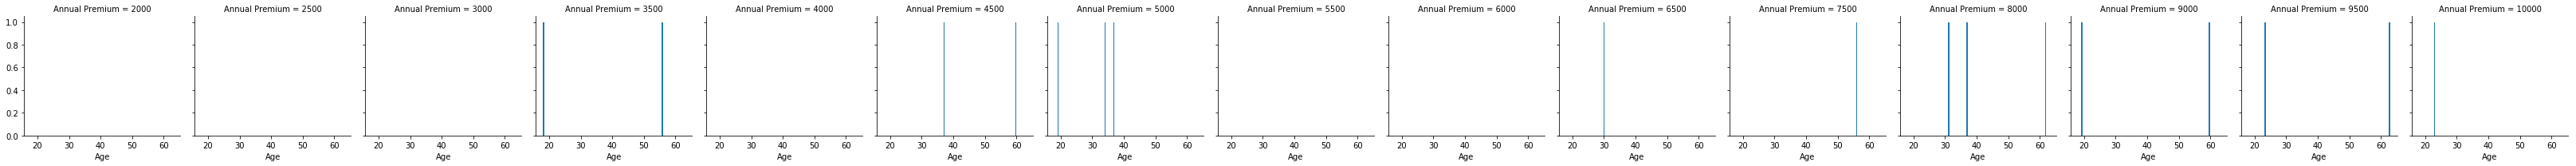

In [29]:
g = sns.FacetGrid(df, col='Annual Premium')
g.map(plt.hist, 'Age', bins=80)

C:\Users\vineetha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


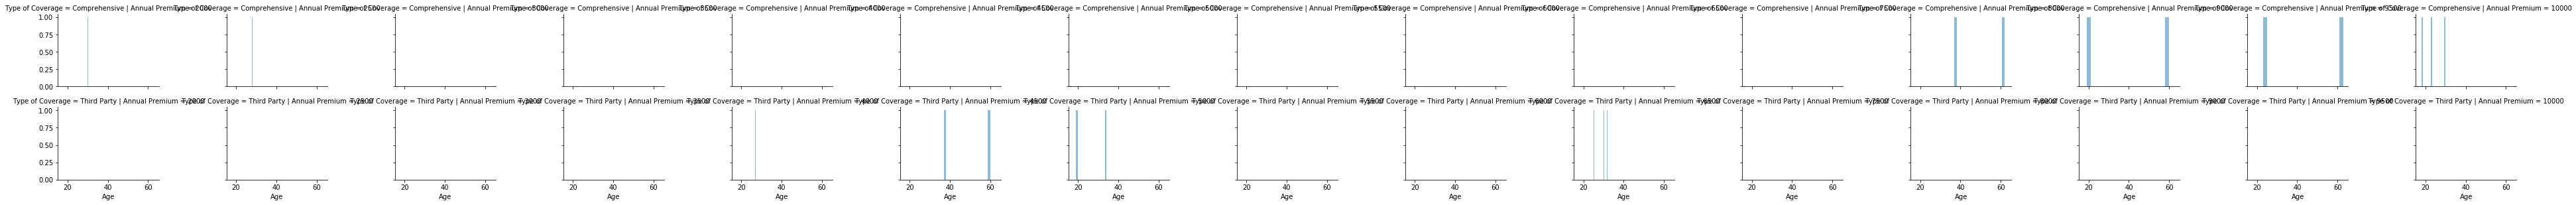

In [32]:
grid = sns.FacetGrid(df, col='Annual Premium', row='Type of Coverage', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

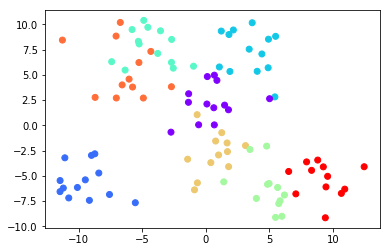

In [33]:
plt.scatter(datasets[0][:,0],datasets[0][:,1],c=datasets[1],cmap='rainbow')


In [34]:
df = df.drop(['Age','Type of Coverage', 'Vehicle Age Years','Year of Purchase'], axis=1)

In [38]:
labelEncoder = LabelEncoder()
labelEncoder.fit(df['Nationality'])
df['Nationality'] = labelEncoder.transform(df['Nationality'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
Nationality                       28 non-null int32
No Claim Availed                  28 non-null int64
Years of Insurance undertaking    28 non-null int64
Restricted No. of Drivers         28 non-null object
Mileage Kms                       28 non-null int64
Vehicle Power in KW               28 non-null int64
Annual Premium                    28 non-null int64
dtypes: int32(1), int64(5), object(1)
memory usage: 1.5+ KB


In [49]:
X = np.array(df.drop(['Restricted No. of Drivers'], 1).astype(float))
y = np.array(df['Restricted No. of Drivers'])

In [52]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
Nationality                       28 non-null int32
No Claim Availed                  28 non-null int64
Years of Insurance undertaking    28 non-null int64
Restricted No. of Drivers         28 non-null object
Mileage Kms                       28 non-null int64
Vehicle Power in KW               28 non-null int64
Annual Premium                    28 non-null int64
dtypes: int32(1), int64(5), object(1)
memory usage: 1.5+ KB


In [53]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.0


In [ ]:
e